In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('Foreign_Exchange_Rates.csv',header=0, index_col=0, parse_dates=True, squeeze=True)
df.head()

,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
Time Serie,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,43.55,1128,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,1122.5,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,43.55,1135,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,43.55,1146.5,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,43.55,1138,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [4]:
#This dataset is a comparison of foreign exchange rates over the last 2 decades. 
#This data compares rates from other countries to the USA.
#This data comes from the federal reserves data program.

In [5]:
#Using this data I hope to be able to predict foreign exchange rates.
#If we can predict them, then we can trading currency for high levels of profit.

In [6]:
#For this analysis we will focus on the Euro.

In [17]:
df.iloc[:,[1]]

,EURO AREA - EURO/US$
Time Serie,
2000-01-03,0.9847
2000-01-04,0.97
2000-01-05,0.9676
2000-01-06,0.9686
2000-01-07,0.9714
...,...
2019-12-25,ND
2019-12-26,0.9007
2019-12-27,0.8949


In [21]:
df1 = df.iloc[:,[1]]

In [22]:
df2 = df1.rename(columns = {'EURO AREA - EURO/US$':'Euro','Time Serie':'Date'})

In [23]:
df2.head()

,Euro
Time Serie,
2000-01-03,0.9847
2000-01-04,0.97
2000-01-05,0.9676
2000-01-06,0.9686
2000-01-07,0.9714


In [24]:
df2[df2.Euro != 'ND']

,Euro
Time Serie,
2000-01-03,0.9847
2000-01-04,0.97
2000-01-05,0.9676
2000-01-06,0.9686
2000-01-07,0.9714
...,...
2019-12-24,0.9022
2019-12-26,0.9007
2019-12-27,0.8949


In [25]:
#Deleting rows that have no applicable data.
#Holidays like Christmas shouldn't have market hours open.

In [26]:
#I also removed all other irrelevent foreign exchange rates because we are focusing on Euros.
#I then changed the column titles to something more representative and easy to understand.

In [27]:
df3 = df2[df2.Euro != 'ND']

In [28]:
df3.dtypes

Euro    object
dtype: object

In [29]:
df3['Euro'] = df3['Euro'].astype(float)
print(df3.dtypes)

Euro    float64
dtype: object


C:\Users\shafim\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
df3 = df3.set_index('Date')
df3.head()

KeyError: "None of ['Date'] are in the columns"

In [31]:
#Since the datatypes are not strings or objects we can begin plotting and visualizing the data.
#Also set the index to the date instead of the raw index given.
#Now the time series plot can be created.

C:\Users\shafim\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


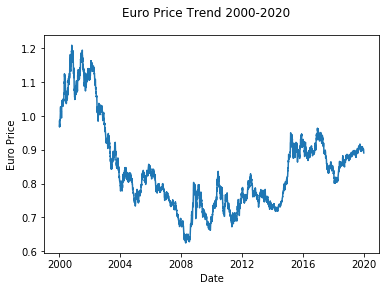

In [32]:
plt.plot(df3)
plt.xlabel('Date')
plt.ylabel('Euro Price')
plt.suptitle('Euro Price Trend 2000-2020')
plt.show()

In [33]:
#From this plot there doesn't seem to be stationarity because the mean appears to fluctuate.
#However there could be some seasonal components to this time series that we could explore.
#This data set is already optimized due to the fact it is on kaggle. 
#If dataset had "ND" values removed that would be much easier.

In [34]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA


In [35]:
plt.rcParams['figure.figsize'] = [12, 9]
df3.index = pd.to_datetime(df3.index)
df3.sort_index(inplace=True)
df4 = df3.resample('W').last()
series = df3['Euro']

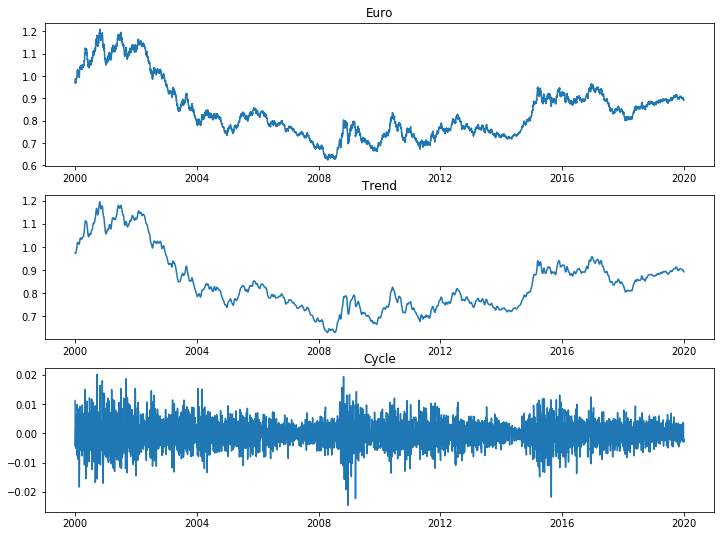

In [36]:
cycle, trend = sm.tsa.filters.hpfilter(series, 50)
fig, ax = plt.subplots(3,1)
ax[0].plot(series)
ax[0].set_title('Euro')
ax[1].plot(trend)
ax[1].set_title('Trend')
ax[2].plot(cycle)
ax[2].set_title('Cycle')
plt.show()

In [37]:
result = seasonal_decompose(df4, model = 'additive', freq=30)

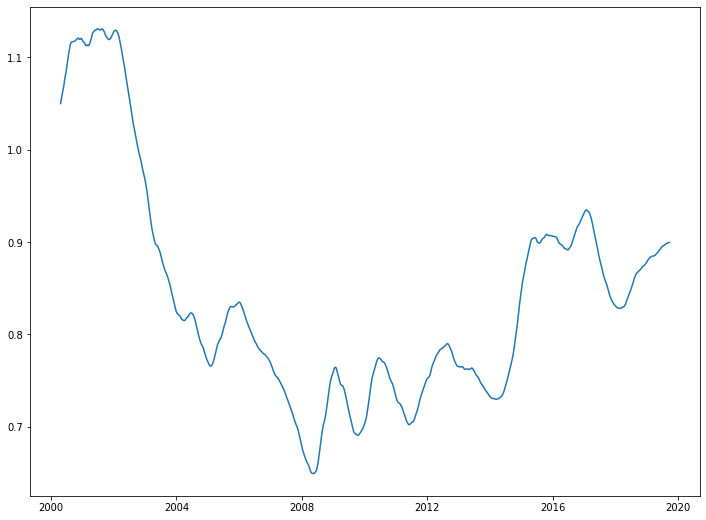

In [38]:
plt.plot(result.trend)

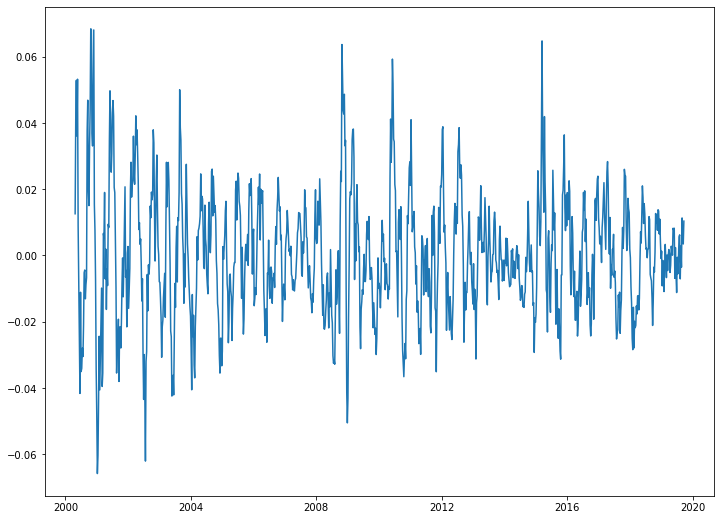

In [40]:
plt.plot(result.resid)

In [43]:
order = 4
x = np.polyfit(np.arange(len(df3['Euro'])),df3['Euro'].values.ravel(),order)
x

array([-7.46423877e-15,  6.25506737e-11, -9.51414635e-08, -2.15493308e-04,
        1.15375287e+00])

In [44]:
#This gives a polynomial that fits the time series.
#These are the coefficients for this time series.
#After this we will try to fit a trend line to our data.
#Consulted github for this last line of code to help me get the approximation.

In [45]:
poly_mdl = np.poly1d(x)
poly_mdl

poly1d([-7.46423877e-15,  6.25506737e-11, -9.51414635e-08, -2.15493308e-04,
        1.15375287e+00])

In [46]:
trend = pd.Series(data = poly_mdl(np.arange(len(df3['Euro']))),
                  index = df3.index)

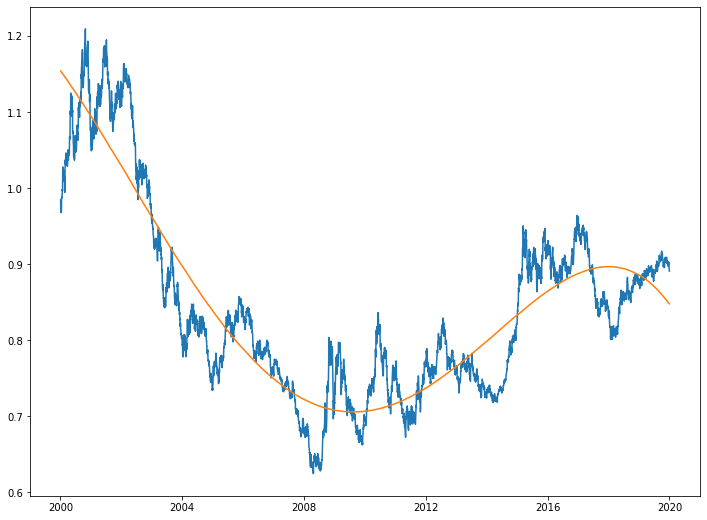

In [47]:
plt.plot(df3)
plt.plot(trend)
plt.show()

In [48]:
#I have now approximated the time series using this fourth degree polynomial.
#However we have an issue here. Since the data is non-stationary we can keep increasing n to get a better fit.
#But this has no practical use to forecasting.
#We will just get some overfit useless model that doesn't show any valid predictions.
#For example if had n = 15. I would get something that fits the SAMPLE data very well.
#But it would only be good for this specfic sample of data.

In [276]:
#It appears that looking at returns instead of price would be more realistic.
#Returns are usually stationary. Price only she be considered when working with high frequency microstructure data.
#Returns = (Next Period Price - Current Price)/(Current Price)

In [54]:
dfn = df2[df2.Euro != 'ND']

In [55]:
dfn['Euro'] = dfn['Euro'].astype(float)
print(dfn.dtypes)

Euro    float64
dtype: object


C:\Users\shafim\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [73]:
df4 = df3.diff()/df3.shift(1)

In [74]:
def perform_adf_test(df4):
    result = adfuller(df4)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [75]:
perform_adf_test(df4)

ValueError: too many values to unpack (expected 2)

Text(0, 0.5, 'Return')

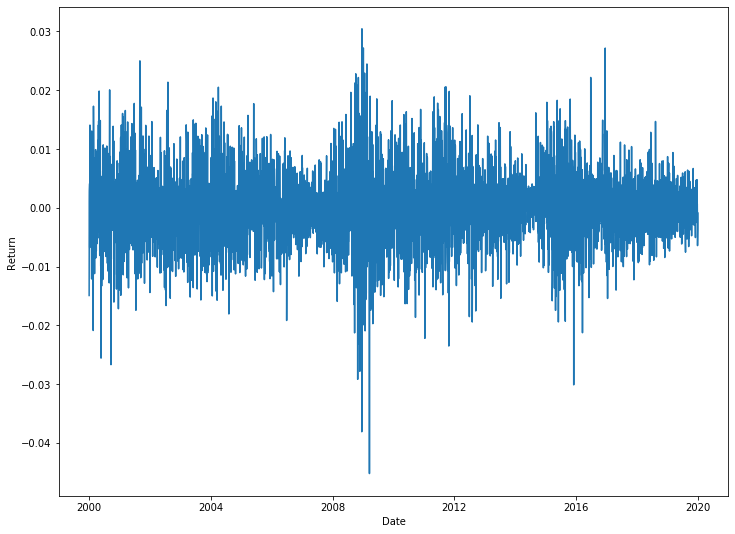

In [72]:
plt.plot(df3.diff()/df3.shift(1))
plt.xlabel('Date')
plt.ylabel('Return')

In [ ]:
#From here I think the best approach would be using Garch for the volatility process.
#Using ARIMA or ARMA could also work to get a forecast from this model.

In [135]:
#Train testing and cross validation comes in multiple parts.
#Ideally for train testing we want to test with 80-20, (Use 80% of data to predict the latter 20%)
#From here we could use 5 fold cross validation. Let's says the data is split into 5 parts (A,B,C,D,E)
#Taking any combination of 4 parts and then utilize that to predict the last bit.
#Once all combinations are done, take the average of all of them to find the best fit model.

In [ ]:
#HOWEVER in this Time Series we shouldn't use cross validation and train testing.
#On independent data sets it would be sufficient.
#Splitting data can cause data leakage.
#We can only use cross validation to predict future points.
#So we can use parts A,B,C,D to predict E, however we can't use it any other way.
#Test set error is a poor estimate of error on an independent test set. (towardsdatascience.com)
#Nested cross validation would be better because it provides an unbiased estimator for error.